# **SPORTS CAR PRICE PREDICTION**

In [1]:
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoLars, BayesianRidge
from sklearn.linear_model import Ridge, ElasticNet, HuberRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
car_prices = pd.read_csv("Sport car price.csv")
car_prices

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [3]:
# types of data
car_prices.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

In [4]:
# checking for NaN in the df
car_prices.isnull().sum().sort_values(ascending=False)

Engine Size (L)            10
Torque (lb-ft)              3
Car Make                    0
Car Model                   0
Year                        0
Horsepower                  0
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [5]:
# show NaN values
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,"2,400,000"
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,"131,190"
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"131,190"
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,"2,400,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,"2,400,000"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"


In [6]:
car_prices[car_prices['Car Model'] == 'C_Two']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,"2,400,000"
278,Rimac,C_Two,2022,Electric,1914,1732,1.85,"2,400,000"
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,"2,400,000"
439,Rimac,C_Two,2021,Electric,1914,1732,1.8,"2,400,000"
509,Rimac,C_Two,2021,Electric,1914,1696,1.9,"2,400,000"
526,Rimac,C_Two,2022,Electric,1914,1696,1.9,"2,400,000"
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,"2,400,000"


In [7]:
# assign engine size to electric for C_Two
car_prices.loc[car_prices['Car Model'] == 'C_Two', 'Engine Size (L)'] = car_prices.loc[car_prices['Car Model'] == 'C_Two','Engine Size (L)'].fillna('Electric')

In [8]:
car_prices[car_prices['Car Model'] == 'C_Two']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,Electric,1914,1696,1.9,"2,400,000"
278,Rimac,C_Two,2022,Electric,1914,1732,1.85,"2,400,000"
387,Rimac,C_Two,2022,Electric,1888,1696,1.8,"2,400,000"
439,Rimac,C_Two,2021,Electric,1914,1732,1.8,"2,400,000"
509,Rimac,C_Two,2021,Electric,1914,1696,1.9,"2,400,000"
526,Rimac,C_Two,2022,Electric,1914,1696,1.9,"2,400,000"
686,Rimac,C_Two,2022,Electric,1914,1696,1.85,"2,400,000"


In [9]:
car_prices[car_prices['Car Model'] == 'Model S Plaid']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,"131,190"
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"131,190"
320,Tesla,Model S Plaid,2021,Electric,1020,1050,1.9,"131,100"
401,Tesla,Model S Plaid,2021,Electric (tri-motor),1020,1050,1.9,"141,190"
511,Tesla,Model S Plaid,2021,Electric,1020,1050,1.9,"141,990"
527,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"140,000"
540,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"139,990"
622,Tesla,Model S Plaid,2022,Electric (100 kWh),1020,1050,1.98,"131,190"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
965,Tesla,Model S Plaid,2022,Electric,"1,020","1,050",1.9,"141,190"


In [10]:
# assign engine size to electric for Tesla Model S Plaid
car_prices.loc[car_prices['Car Model'] == 'Model S Plaid', 'Engine Size (L)'] = car_prices.loc[car_prices['Car Model'] == 'Model S Plaid','Engine Size (L)'].fillna('Electric')

In [11]:
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"


In [12]:
# assign engine size to electric for Tesla Roadster
car_prices.loc[car_prices['Car Model'] == 'Roadster', 'Engine Size (L)'] = \
car_prices.loc[car_prices['Car Model'] == 'Roadster', 'Engine Size (L)'].fillna('Electric')
car_prices[car_prices['Car Model'] == 'Roadster']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
99,Tesla,Roadster,2022,Electric,1000+,737,1.9,"200,000"
335,Tesla,Roadster,2022,-,1000+,-,1.9,"200,000"
354,Tesla,Roadster,2022,Electric,1000+,"10,000+",1.9,"200,000"
364,Tesla,Roadster,2023,Electric,"1,000+",737,< 1.9,"200,000"
389,Tesla,Roadster,2022,Electric,10000+,0,1.9,"200,000"
821,Tesla,Roadster,2022,Electric,1000,737,1.9,"200,000"
885,Tesla,Roadster,2022,0,"10,000","7,376",1.9,"200,000"
916,Tesla,Roadster,2022,Electric,"10,000+",NaN,1.9,"200,000"


In [13]:
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,Electric,"10,000+",NaN,1.9,"200,000"


In [14]:
# the same for other electric cars
car_prices.loc[car_prices['Car Model'] == 'Taycan Turbo S', 'Engine Size (L)'] = \
car_prices.loc[car_prices['Car Model'] == 'Taycan Turbo S', 'Engine Size (L)'].fillna('Electric')

car_prices.loc[car_prices['Car Model'] == 'Evija', 'Engine Size (L)'] = \
car_prices.loc[car_prices['Car Model'] == 'Evija', 'Engine Size (L)'].fillna('Electric')

car_prices.loc[car_prices['Car Model'] == 'Taycan', 'Engine Size (L)'] = \
car_prices.loc[car_prices['Car Model'] == 'Taycan', 'Engine Size (L)'].fillna('Electric')

car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,Electric,"10,000+",NaN,1.9,"200,000"


In [15]:
car_prices[car_prices['Car Model'] == 'Model S Plaid']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
171,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"131,190"
247,Tesla,Model S Plaid,2022,Electric,1020,1050,1.9,"131,190"
320,Tesla,Model S Plaid,2021,Electric,1020,1050,1.9,"131,100"
401,Tesla,Model S Plaid,2021,Electric (tri-motor),1020,1050,1.9,"141,190"
511,Tesla,Model S Plaid,2021,Electric,1020,1050,1.9,"141,990"
527,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"140,000"
540,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"139,990"
622,Tesla,Model S Plaid,2022,Electric (100 kWh),1020,1050,1.98,"131,190"
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
965,Tesla,Model S Plaid,2022,Electric,"1,020","1,050",1.9,"141,190"


In [16]:
# changing the engine size, horsepower, torque and 0-60 MPH acceleration time for Tesla Model S
car_prices.loc[car_prices['Car Model'] == 'Model S Plaid', 'Engine Size (L)'] = 'Electric'
car_prices.loc[car_prices['Car Model'] == 'Model S Plaid', 'Horsepower'] = 1020
car_prices.loc[car_prices['Car Model'] == 'Model S Plaid', 'Torque (lb-ft)'] = 1050
car_prices.loc[car_prices['Car Model'] == 'Model S Plaid', '0-60 MPH Time (seconds)'] = 1.98
car_prices[car_prices['Car Model'] == 'Model S Plaid']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
171,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"131,190"
247,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"131,190"
320,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"131,100"
401,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"141,190"
511,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"141,990"
527,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"140,000"
540,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"139,990"
622,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"131,190"
642,Tesla,Model S Plaid,2021,Electric,1020,1050,1.98,"139,990"
965,Tesla,Model S Plaid,2022,Electric,1020,1050,1.98,"141,190"


In [17]:
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,Electric,"10,000+",NaN,1.9,"200,000"


In [18]:
car_prices[car_prices['Car Model'] == 'Roadster']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
99,Tesla,Roadster,2022,Electric,1000+,737,1.9,"200,000"
335,Tesla,Roadster,2022,-,1000+,-,1.9,"200,000"
354,Tesla,Roadster,2022,Electric,1000+,"10,000+",1.9,"200,000"
364,Tesla,Roadster,2023,Electric,"1,000+",737,< 1.9,"200,000"
389,Tesla,Roadster,2022,Electric,10000+,0,1.9,"200,000"
821,Tesla,Roadster,2022,Electric,1000,737,1.9,"200,000"
885,Tesla,Roadster,2022,0,"10,000","7,376",1.9,"200,000"
916,Tesla,Roadster,2022,Electric,"10,000+",NaN,1.9,"200,000"


In [19]:
# changing the engine size, horsepower, torque and 0-60 MPH acceleration time for Tesla Roadster
car_prices.loc[car_prices['Car Model'] == 'Roadster', 'Engine Size (L)'] = 'Electric'
car_prices.loc[car_prices['Car Model'] == 'Roadster', 'Horsepower'] = 1020
car_prices.loc[car_prices['Car Model'] == 'Roadster', 'Torque (lb-ft)'] = 1050
car_prices.loc[car_prices['Car Model'] == 'Roadster', '0-60 MPH Time (seconds)'] = 1.9
car_prices[car_prices['Car Model'] == 'Roadster']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
99,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
335,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
354,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
364,Tesla,Roadster,2023,Electric,1020,1050,1.9,"200,000"
389,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
821,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
885,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"
916,Tesla,Roadster,2022,Electric,1020,1050,1.9,"200,000"


In [20]:
car_prices[(car_prices['Car Model'] == 'GranTurismo') & (car_prices['Engine Size (L)'] == 'Electric')]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"


In [21]:
car_prices.loc[(car_prices['Car Model'] == 'GranTurismo') & (car_prices['Engine Size (L)'] == 'Electric'), 'Year'] = 2023
car_prices.loc[(car_prices['Car Model'] == 'GranTurismo') & (car_prices['Engine Size (L)'] == 'Electric'), 'Torque (lb-ft)'] = 1350
car_prices[(car_prices['Car Model'] == 'GranTurismo') & (car_prices['Engine Size (L)'] == 'Electric')]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
878,Maserati,GranTurismo,2023,Electric,550,1350,2.8,"200,000"


In [22]:
car_prices.loc[car_prices['Horsepower'] == '1,500', 'Horsepower'] = 1500
car_prices[car_prices['Car Model'] == 'Chiron']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
11,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
85,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"
113,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
158,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
206,Bugatti,Chiron,2021,8,1500,1180,2.3,"3,000,000"
274,Bugatti,Chiron,2021,8,1500,1180,2.4,"2,998,000"
303,Bugatti,Chiron,2021,8,1479,1180,2.3,"2,998,000"
341,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
376,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"
434,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"


In [23]:
car_prices.loc[car_prices['Car Model'] == 'Chiron', 'Horsepower'] = 1500
car_prices.loc[car_prices['Car Model'] == 'Chiron', 'Torque (lb-ft)'] = 1180
car_prices[car_prices['Car Model'] == 'Chiron']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
11,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
85,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"
113,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
158,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
206,Bugatti,Chiron,2021,8,1500,1180,2.3,"3,000,000"
274,Bugatti,Chiron,2021,8,1500,1180,2.4,"2,998,000"
303,Bugatti,Chiron,2021,8,1500,1180,2.3,"2,998,000"
341,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
376,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"
434,Bugatti,Chiron,2022,8,1500,1180,2.4,"3,000,000"


In [24]:
#checking engine size distribution
car_prices['Engine Size (L)'].value_counts().sort_index()

1.5                    2
1.5 + Electric         1
1.7                    4
1.8                    3
2                     34
2.0 (Electric)         1
2.3                    1
2.5                   25
2.9                   30
3                     85
3.3                    1
3.5                   79
3.6                    1
3.7                   35
3.8                   38
3.9                   30
4                    219
4.0 (Hybrid)           1
4.4                   11
4.6                    1
4.7                   23
5                     68
5.2                   29
5.5                    1
5.7                    1
6                     28
6.2                  113
6.3                    1
6.4                    1
6.5                   46
6.6                    3
6.7                    1
6.8                    6
7                      1
8                     23
8.4                    3
Electric              50
Electric (93 kWh)      1
Electric Motor         3
Hybrid                 2


In [25]:
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)


In [26]:
car_prices

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


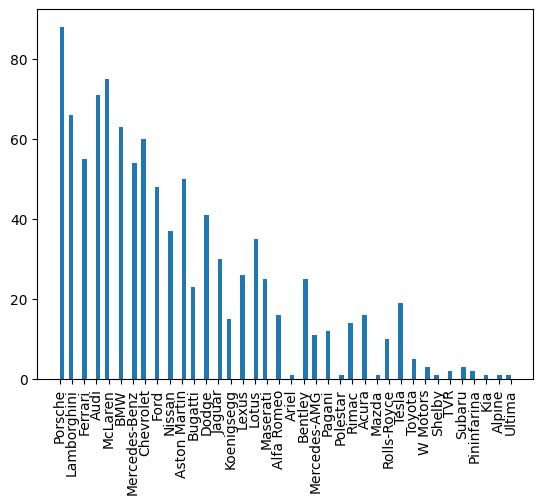

In [27]:
# car makes hist
fig, ax = plt.subplots(1, 1)
make_hist = ax.hist(car_prices['Car Make'], bins=100)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [28]:
# checking for distribution of the data in the df
"""also, we need to check if there are any kind of artificially
unique values which may be a result of typo"""

for i in list(car_prices):
    print(car_prices[i].value_counts(), '\n\n')

Porsche          88
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Dodge            41
Nissan           37
Lotus            35
Jaguar           30
Lexus            26
Maserati         25
Bentley          25
Bugatti          23
Tesla            19
Alfa Romeo       16
Acura            16
Koenigsegg       15
Rimac            14
Pagani           12
Mercedes-AMG     11
Rolls-Royce      10
Toyota            5
W Motors          3
Subaru            3
Pininfarina       2
TVR               2
Kia               1
Alpine            1
Ariel             1
Shelby            1
Mazda             1
Polestar          1
Ultima            1
Name: Car Make, dtype: int64 


GT                  55
Camaro ZL1          30
Evora GT            27
Continental GT      24
LC 500              24
                    ..
Fenyr SuperSport     1
Panamera Turbo       1
Atom                 1
A

In [29]:
## horsepower distribution
car_prices['Horsepower'].value_counts()

503     45
591     39
650     31
660     30
416     29
        ..
288      1
780      1
1020     1
368      1
621      1
Name: Horsepower, Length: 117, dtype: int64

In [30]:
car_prices.loc[~car_prices['Horsepower'].astype(str).str.isdigit(), 'Horsepower'].tolist()

[]

In [31]:
car_prices[car_prices.isna().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)


In [32]:
car_prices[car_prices['Horsepower'] == '1,500']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)


In [33]:
car_prices[car_prices['Car Make'] == 'Acura']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
82,Acura,NSX,2022,3.5,573,476,2.9,"159,495"
155,Acura,NSX,2021,3.5,573,476,2.7,"157,500"
233,Acura,NSX,2022,3.5,573,476,2.7,"157,500"
281,Acura,NSX,2022,3.5,573,476,2.9,"157,500"
324,Acura,NSX,2021,3.5,573,476,2.7,"159,495"
338,Acura,NSX,2022,3.5,573,476,2.7,"157,500"
355,Acura,NSX,2022,3.5,573,476,2.7,"157,500"
391,Acura,NSX,2021,3.5,573,476,2.7,"157,500"
496,Acura,NSX,2021,3.5,573,476,2.7,"159,495"
516,Acura,NSX,2021,3.5,573,476,2.9,"157,500"


In [34]:
car_prices.loc[car_prices['Car Model'] == 'NSX', '0-60 MPH Time (seconds)'] = 2.9

In [35]:
car_prices[car_prices['Car Make'] == 'Alfa Romeo']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
19,Alfa Romeo,Giulia Quadrifoglio,2022,2.9,505,443,3.8,"78,000"
236,Alfa Romeo,4C,2020,1.7,237,258,4.1,"67,150"
290,Alfa Romeo,Giulia Quadrifoglio,2021,2.9,505,443,3.8,"76,400"
325,Alfa Romeo,Giulia Quadrifoglio,2021,2.9,505,443,3.8,"76,950"
410,Alfa Romeo,Giulia Quadrifoglio,2022,2.9,505,443,3.8,"81,250"
470,Alfa Romeo,Giulia Quadrifoglio,2022,2.9,505,443,3.8,"80,500"
478,Alfa Romeo,4C Spider,2020,1.7,237,258,4.1,"67,150"
536,Alfa Romeo,4C Spider,2020,1.8,237,258,4.1,"68,745"
577,Alfa Romeo,Giulia Quadrifoglio,2021,2.9,505,443,3.8,"74,750"
657,Alfa Romeo,Giulia Quadrifoglio,2021,2.9,505,443,3.8,"75,000"


In [36]:
columns = list(car_prices)
columns

['Car Make',
 'Car Model',
 'Year',
 'Engine Size (L)',
 'Horsepower',
 'Torque (lb-ft)',
 '0-60 MPH Time (seconds)',
 'Price (in USD)']

In [37]:
# rows with object in engine size
car_prices[car_prices['Engine Size (L)'] == '1.5 + Electric']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
42,BMW,i8,2020,1.5 + Electric,369,420,4.2,"148,500"


In [38]:
car_prices[car_prices['Car Model'] == 'i8']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
42,BMW,i8,2020,1.5 + Electric,369,420,4.2,"148,500"
715,BMW,i8,2022,1.5,369,184,4.2,"147,500"
732,BMW,i8,2022,Hybrid,369,184,4.2,"148,500"
841,BMW,i8,2022,1.5,369,184,4.2,"147,500"


In [39]:
# changing i8 engine size
car_prices.loc[car_prices['Car Model'] == 'i8', 'Engine Size (L)'] = 1.5
car_prices.loc[car_prices['Car Model'] == 'i8', 'Torque (lb-ft)'] = 570

In [40]:
car_prices[car_prices['Car Model'] == 'i8']

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
42,BMW,i8,2020,1.5,369,570,4.2,"148,500"
715,BMW,i8,2022,1.5,369,570,4.2,"147,500"
732,BMW,i8,2022,1.5,369,570,4.2,"148,500"
841,BMW,i8,2022,1.5,369,570,4.2,"147,500"


In [41]:
# adding powertrain column
car_prices['Powertrain'] = car_prices['Car Model'].apply(lambda x: 'Hybrid' if x == 'i8' else 'Gas')

In [42]:
# assinging electric cars to electric powertrain
car_prices.loc[(car_prices['Car Make'] == 'Tesla')
               | (car_prices['Car Make'] == 'Rimac'), 'Powertrain'] = 'Electric'

In [43]:
# data cleaning (engine size)

car_prices.loc[car_prices['Engine Size (L)'] == '2.0 (Electric)', 'Powertrain'] = 'Electric'
car_prices.loc[car_prices['Engine Size (L)'] == '2.0 (Electric)', 'Engine Size (L)'] = 0.0

car_prices.loc[car_prices['Engine Size (L)'] == '4.0 (Hybrid)', 'Powertrain'] = 'Hybrid'
car_prices.loc[car_prices['Engine Size (L)'] == '4.0 (Hybrid)', 'Engine Size (L)'] = 4.0

car_prices.loc[car_prices['Engine Size (L)'] == 'Hybrid', 'Powertrain'] = 'Hybrid'
car_prices.loc[car_prices['Engine Size (L)'] == 'Hybrid', 'Engine Size (L)'] = 4.0

car_prices.loc[car_prices['Engine Size (L)'] == 'Electric (93 kWh)', 'Powertrain'] = 'Electric'
car_prices.loc[car_prices['Engine Size (L)'] == 'Electric (93 kWh)', 'Engine Size (L)'] = 0

car_prices.loc[car_prices['Engine Size (L)'] == 'Electric Motor', 'Powertrain'] = 'Electric'
car_prices.loc[car_prices['Engine Size (L)'] == 'Electric Motor', 'Engine Size (L)'] = 0
car_prices.loc[car_prices['Engine Size (L)'] == 'Electric', 'Engine Size (L)'] = 0

car_prices[car_prices['Engine Size (L)'] == 'Electric (93 kWh)']
car_prices.loc[car_prices['Engine Size (L)'] == 'Electric (93 kWh)', 'Engine Size (L)'] = 0

car_prices.loc[car_prices['Engine Size (L)'] == 'Hybrid (4.0)', 'Powertrain'] = 'Hybrid'
car_prices.loc[car_prices['Engine Size (L)'] == 'Hybrid (4.0)', 'Engine Size (L)'] = 4.0

In [44]:
car_prices.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
Powertrain                 object
dtype: object

In [45]:
# changing engine size to float
car_prices = car_prices.astype({"Engine Size (L)": 'float64'})

In [46]:
# removing obj characters from the price column
car_prices['Price (in USD)'] = car_prices['Price (in USD)'].str.replace('\'', '')
car_prices['Price (in USD)'] = car_prices['Price (in USD)'].str.replace(',', '')

In [47]:
# changing price column to int
car_prices = car_prices.astype({'Price (in USD)': 'int64' })

In [48]:
# changing other columns to int/float
car_prices = car_prices.astype({"Horsepower": 'int64', "Torque (lb-ft)": 'int64', "0-60 MPH Time (seconds)": float})

In [49]:
# dtypes changed successfully
car_prices.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)            float64
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
Powertrain                  object
dtype: object

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine Size (L)'}>],
       [<Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Torque (lb-ft)'}>],
       [<Axes: title={'center': '0-60 MPH Time (seconds)'}>,
        <Axes: title={'center': 'Price (in USD)'}>]], dtype=object)

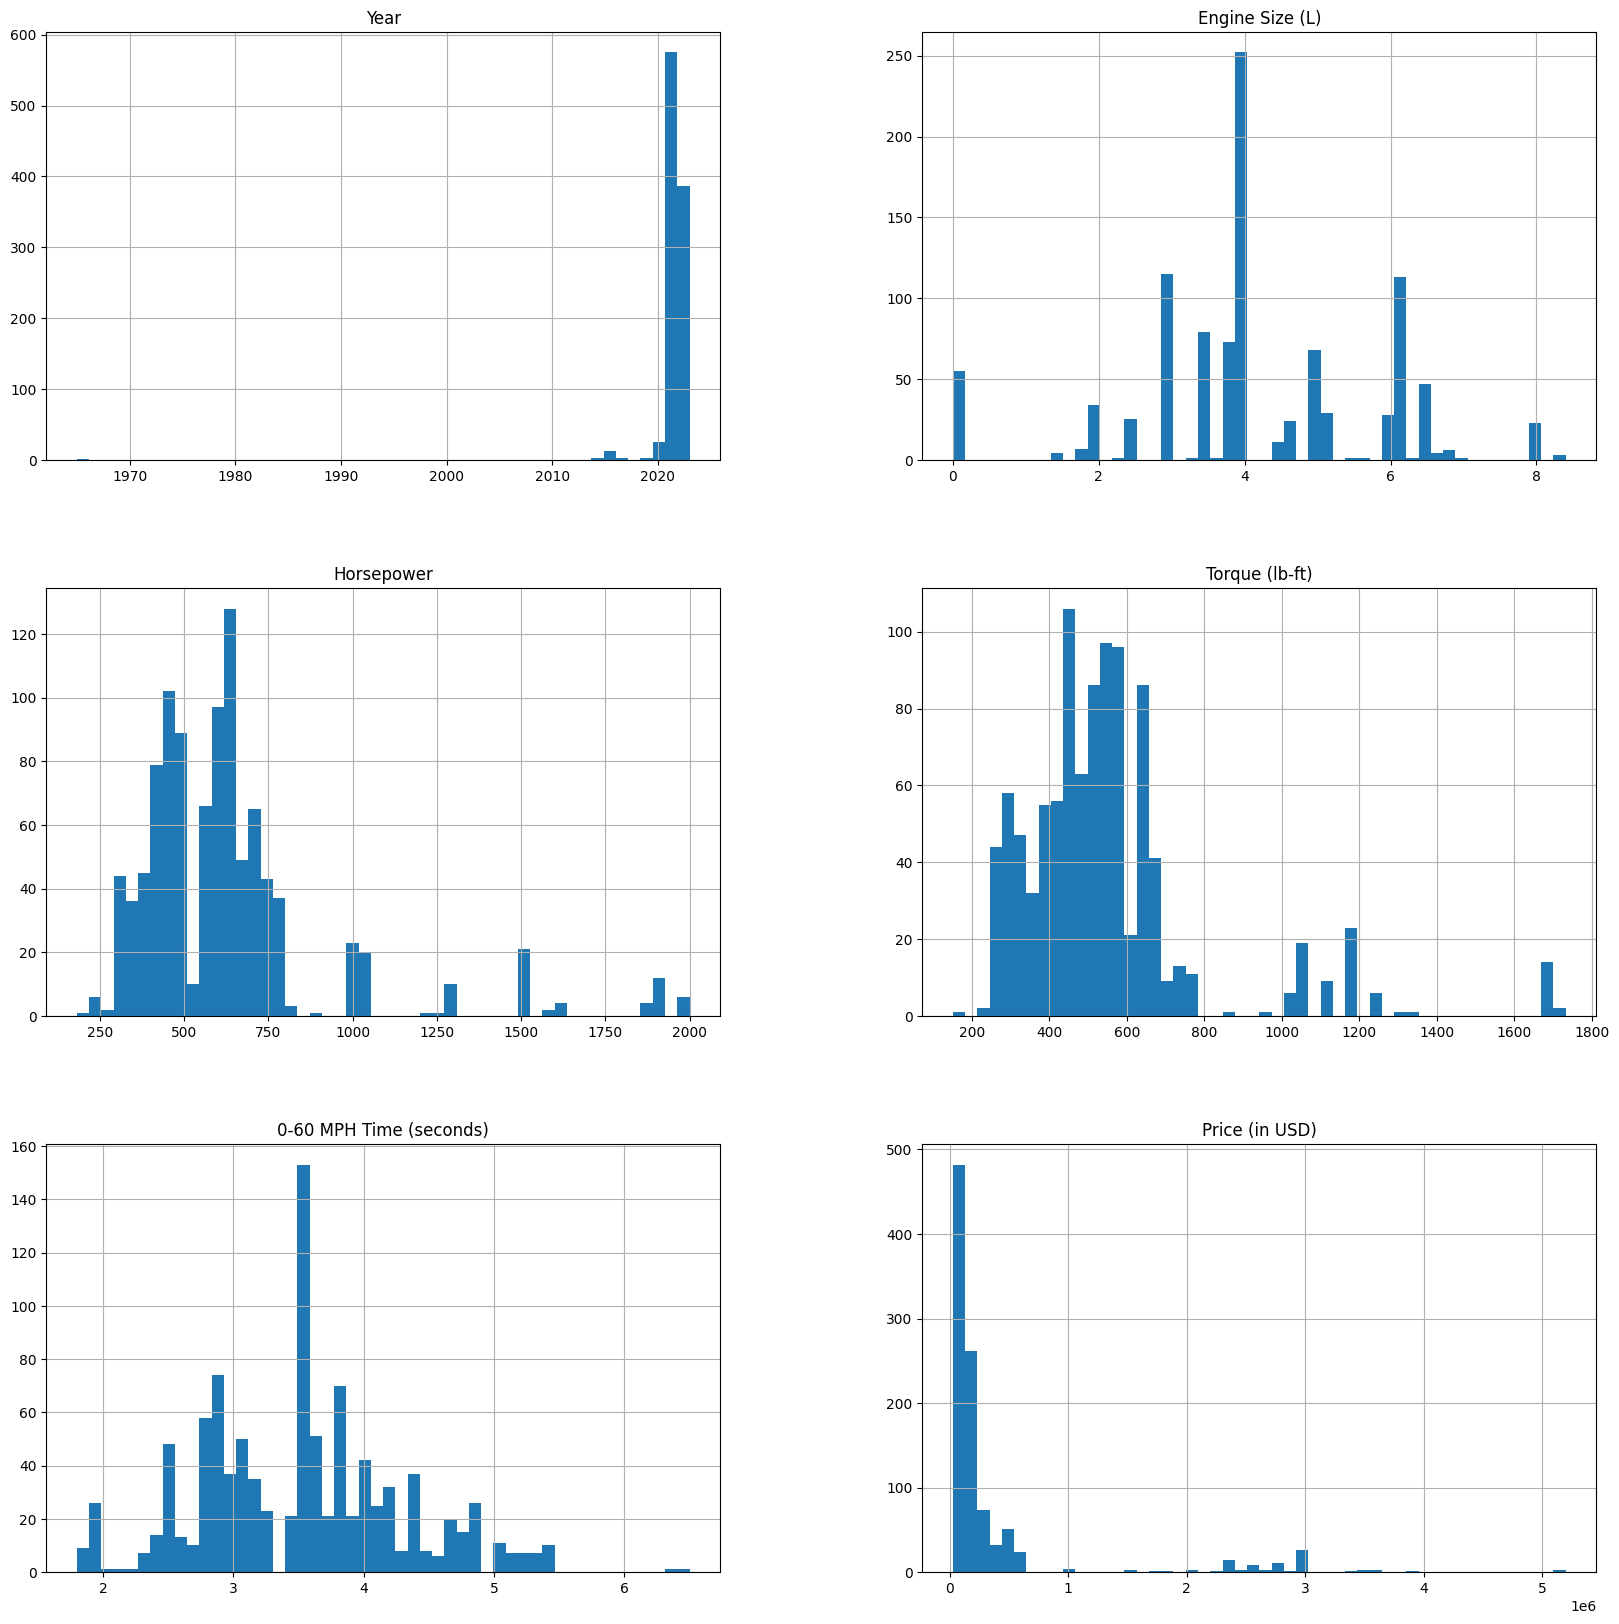

In [50]:
#distribution of the numerical data
car_prices.hist(bins=50, figsize=(20,20))

In [51]:
# showing year below 2010
car_prices[car_prices['Year'] < 2010]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Powertrain
170,Shelby,Cobra,1965,7.0,435,440,4.2,1000000,Gas


In [52]:
# removing skewed values (year)
del_idx = car_prices.index[car_prices['Year'] < 2010].tolist()
car_prices = car_prices.drop(del_idx)

In [53]:
# reseting index count
car_prices.reset_index(drop=True, inplace=True)
car_prices

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Powertrain
0,Porsche,911,2022,3.0,379,331,4.00,101200,Gas
1,Lamborghini,Huracan,2021,5.2,630,443,2.80,274390,Gas
2,Ferrari,488 GTB,2022,3.9,661,561,3.00,333750,Gas
3,Audi,R8,2022,5.2,562,406,3.20,142700,Gas
4,McLaren,720S,2021,4.0,710,568,2.70,298000,Gas
...,...,...,...,...,...,...,...,...,...
1001,Koenigsegg,Jesko,2022,5.0,1280,1106,2.50,3000000,Gas
1002,Lotus,Evija,2021,0.0,1972,1254,2.00,2000000,Electric
1003,McLaren,Senna,2021,4.0,789,590,2.70,1000000,Gas
1004,Pagani,Huayra,2021,6.0,764,738,3.00,2600000,Gas


<Axes: >

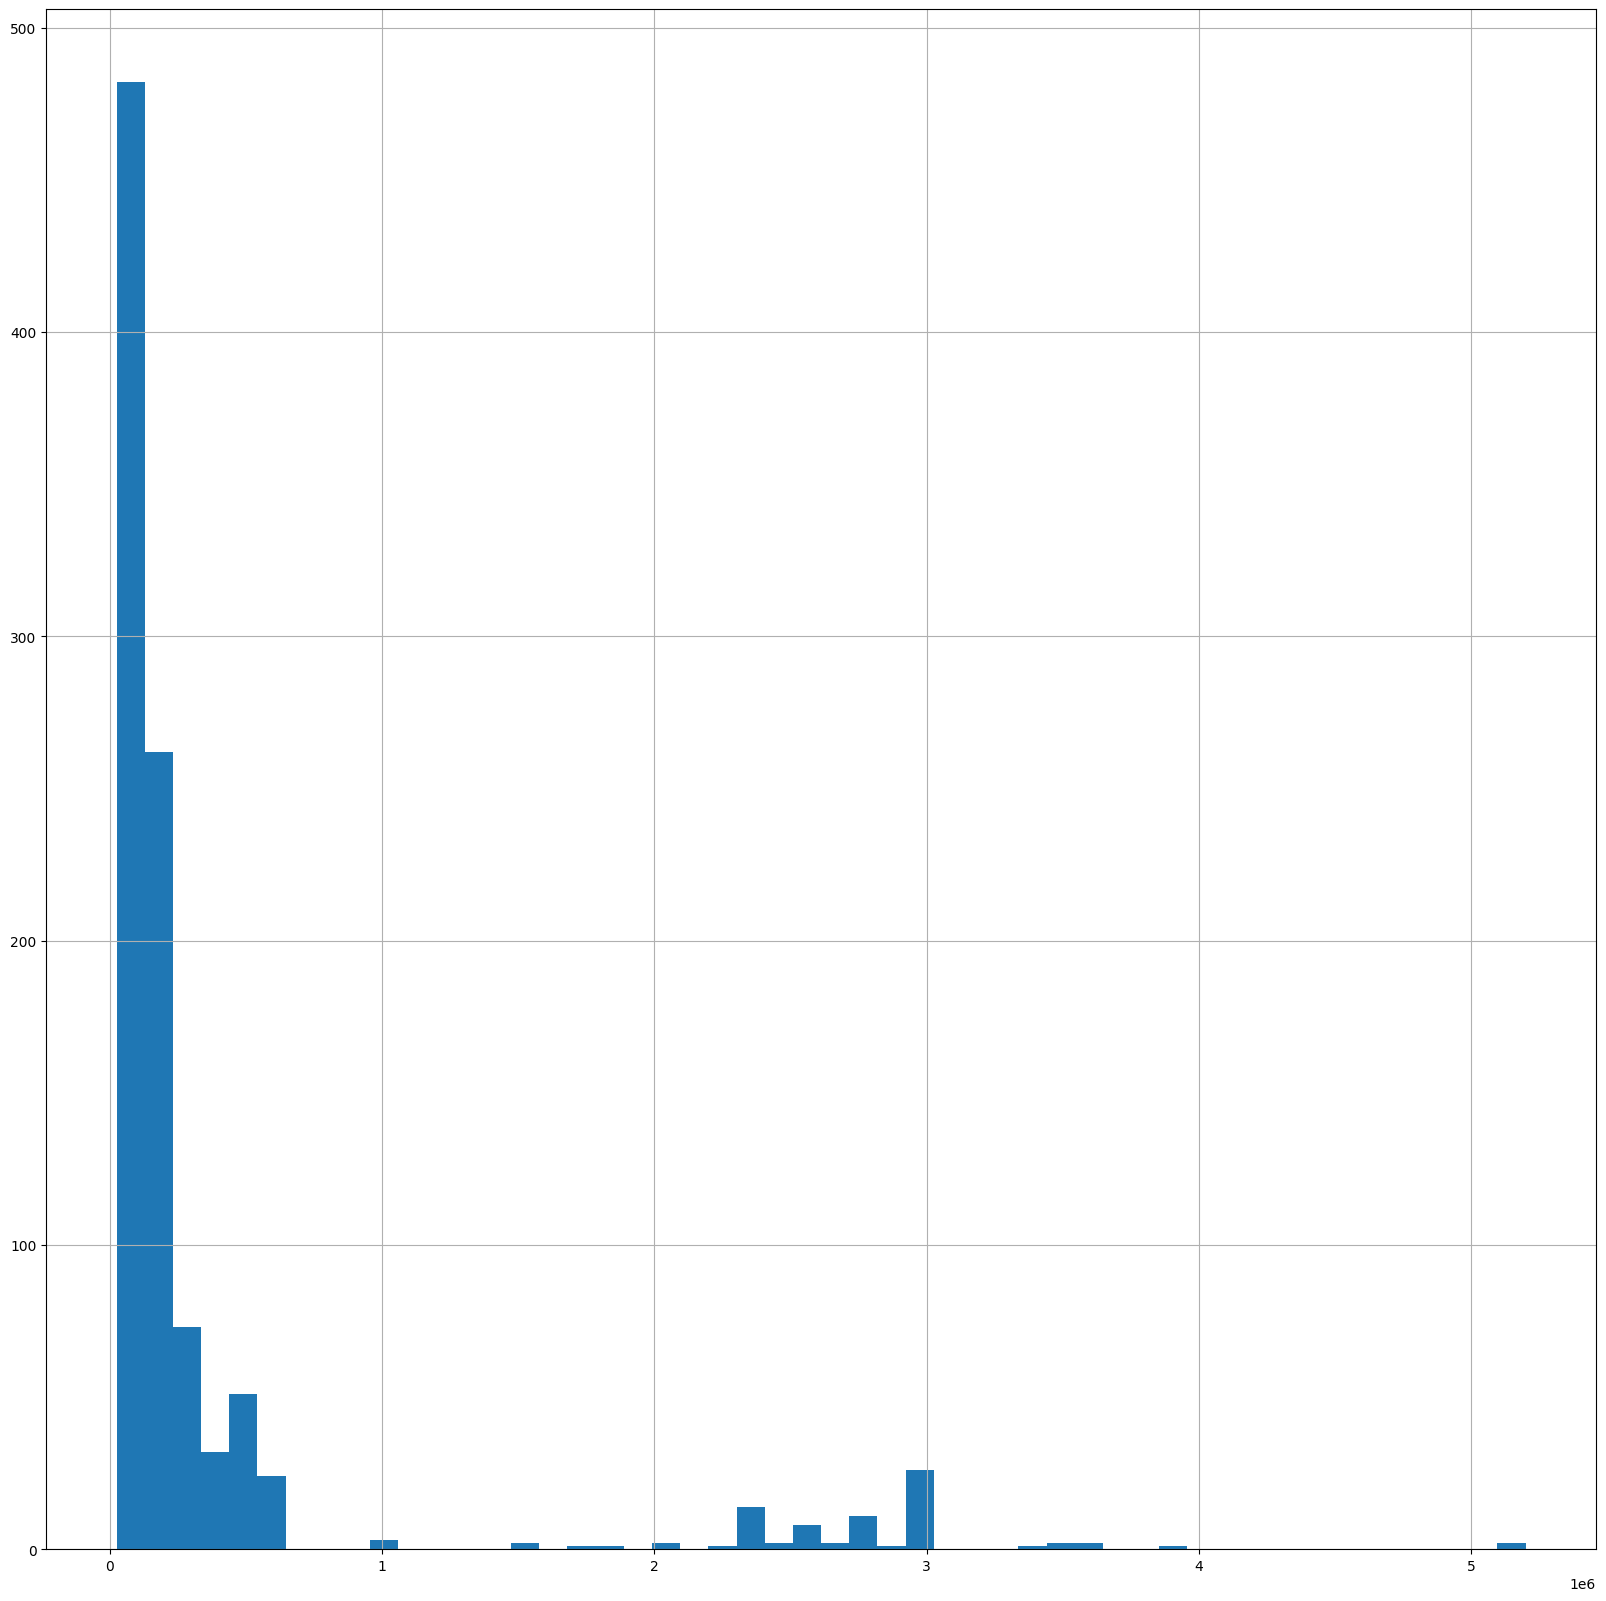

In [54]:
# heavily skewed price distribution
car_prices['Price (in USD)'].hist(bins=50, figsize=(20,20))

<Axes: >

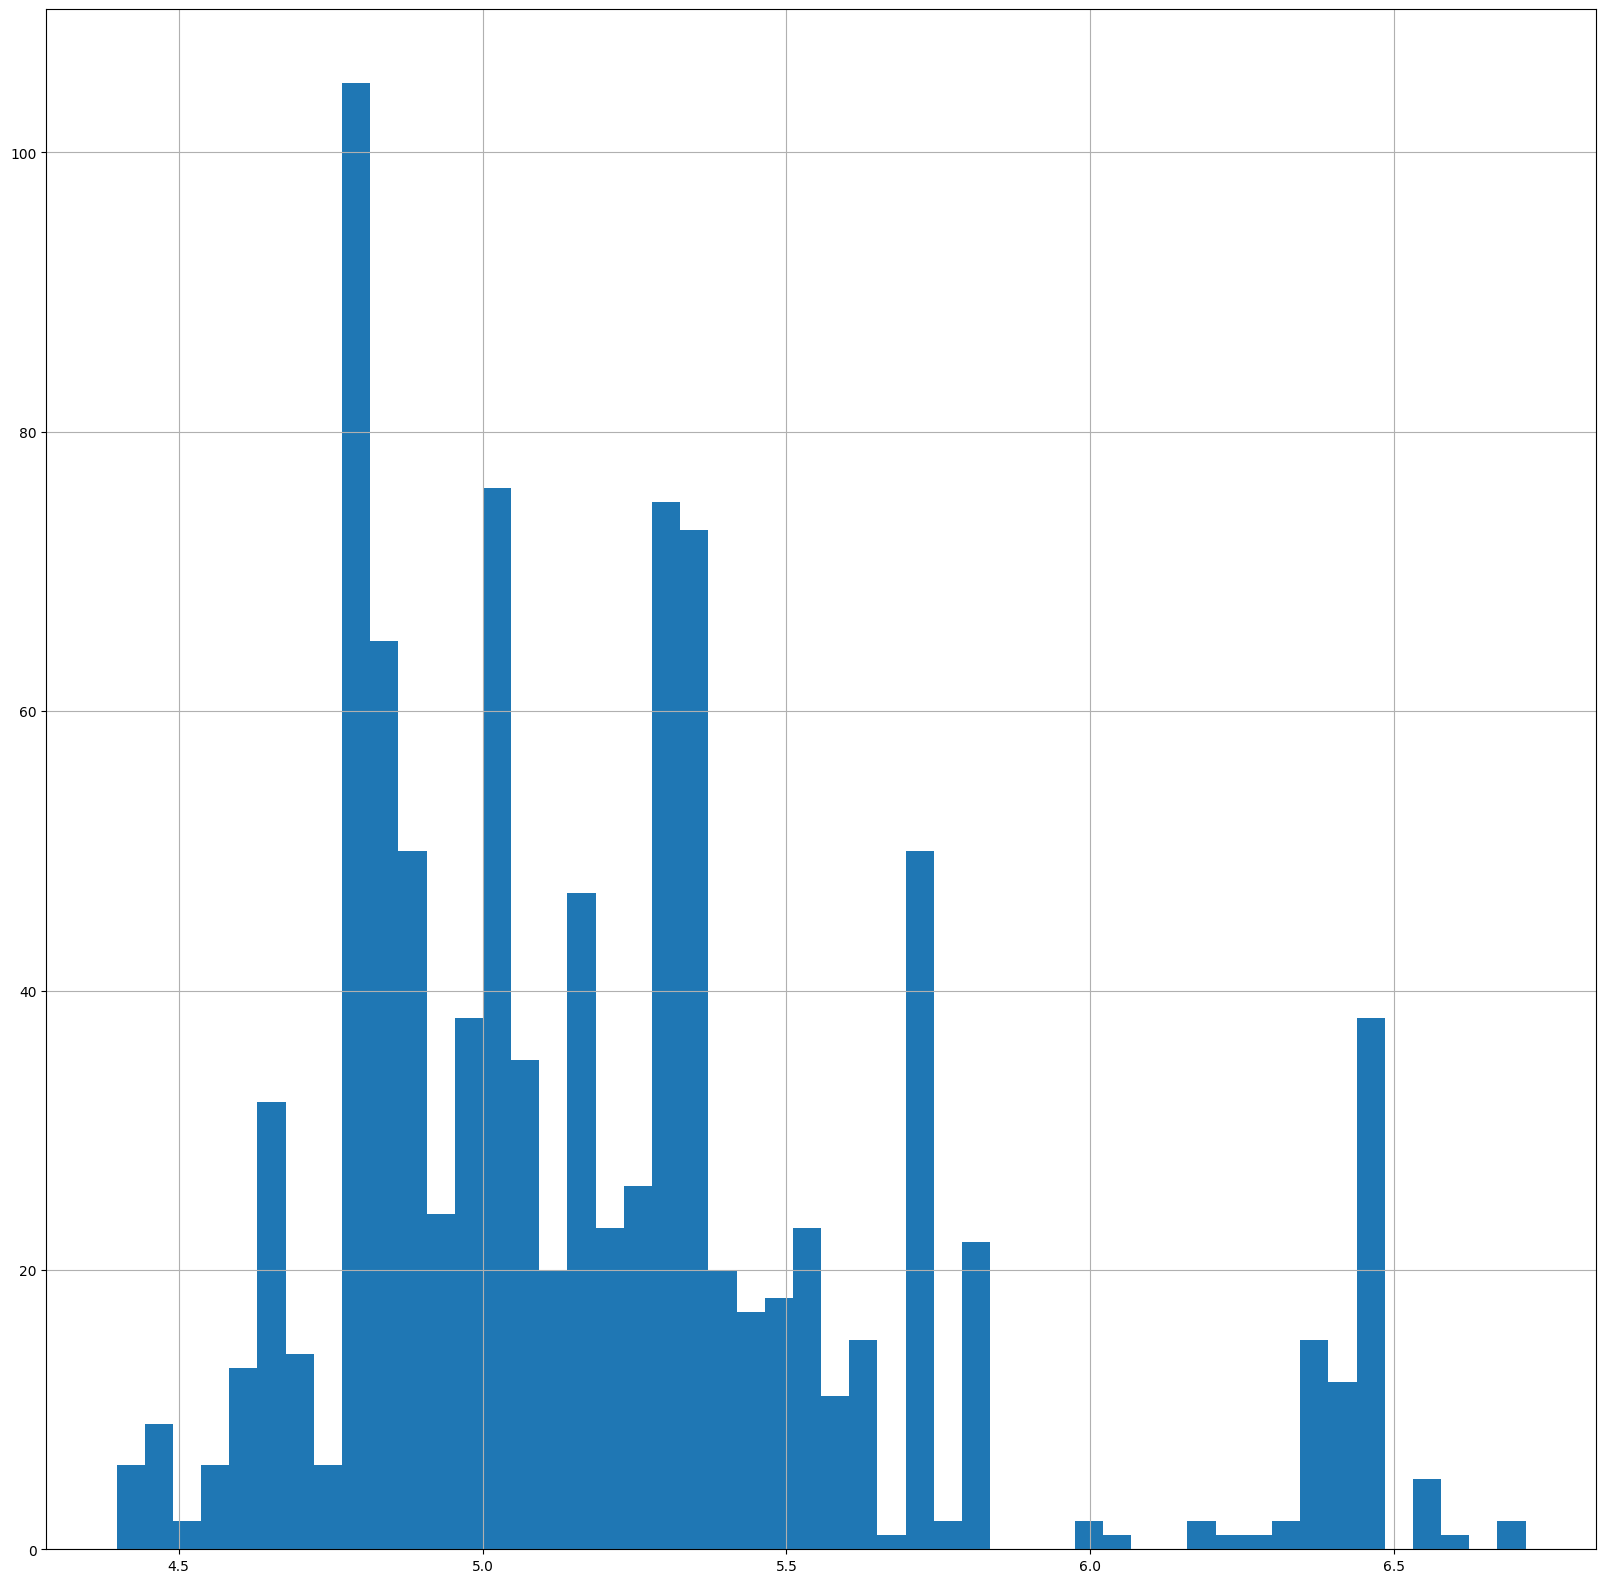

In [55]:
# changing price distribution to log scale
np.log10(car_prices['Price (in USD)']).hist(bins=50, figsize=(20,20))

In [56]:
car_prices['Price (in USD)'] = np.log10(car_prices['Price (in USD)'])

In [57]:
# adding columns 1 hp price and 1 lb-ft price
car_prices['1 hp price'] = car_prices['Horsepower'] / car_prices['Price (in USD)']
car_prices['1 lb-ft price'] = car_prices['Torque (lb-ft)'] / car_prices['Price (in USD)']

In [58]:
car_prices

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Powertrain,1 hp price,1 lb-ft price
0,Porsche,911,2022,3.0,379,331,4.00,5.005181,Gas,75.721545,66.131481
1,Lamborghini,Huracan,2021,5.2,630,443,2.80,5.438368,Gas,115.843571,81.458257
2,Ferrari,488 GTB,2022,3.9,661,561,3.00,5.523421,Gas,119.672204,101.567484
3,Audi,R8,2022,5.2,562,406,3.20,5.154424,Gas,109.032552,78.767288
4,McLaren,720S,2021,4.0,710,568,2.70,5.474216,Gas,129.698931,103.759145
...,...,...,...,...,...,...,...,...,...,...,...
1001,Koenigsegg,Jesko,2022,5.0,1280,1106,2.50,6.477121,Gas,197.618656,170.754870
1002,Lotus,Evija,2021,0.0,1972,1254,2.00,6.301030,Electric,312.964706,199.015082
1003,McLaren,Senna,2021,4.0,789,590,2.70,6.000000,Gas,131.500000,98.333333
1004,Pagani,Huayra,2021,6.0,764,738,3.00,6.414973,Gas,119.096364,115.043346


<Axes: >

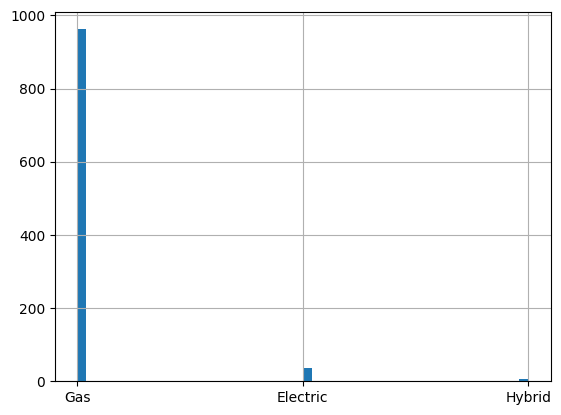

In [59]:
# powertrain distribution
car_prices['Powertrain'].hist(bins=50)

In [60]:
# scaling and encoding the categorical data

cat_cols = car_prices.select_dtypes(include=['object'])
num_cols = car_prices.select_dtypes(include=['float64', 'int64'])

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
car_prices_cat_cols = pd.DataFrame(ordinal_encoder.fit_transform(cat_cols), columns=cat_cols.columns)

car_prices_encoded = pd.concat([car_prices_cat_cols, num_cols], axis=1)
car_prices_encoded

,Car Make,Car Model,Powertrain,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),1 hp price,1 lb-ft price
0,28.0,18.0,1.0,2022,3.0,379,331,4.00,5.005181,75.721545,66.131481
1,16.0,97.0,1.0,2021,5.2,630,443,2.80,5.438368,115.843571,81.458257
2,11.0,5.0,1.0,2022,3.9,661,561,3.00,5.523421,119.672204,101.567484
3,5.0,129.0,1.0,2022,5.2,562,406,3.20,5.154424,109.032552,78.767288
4,21.0,15.0,1.0,2021,4.0,710,568,2.70,5.474216,129.698931,103.759145
...,...,...,...,...,...,...,...,...,...,...,...
1001,15.0,98.0,1.0,2022,5.0,1280,1106,2.50,6.477121,197.618656,170.754870
1002,18.0,75.0,0.0,2021,0.0,1972,1254,2.00,6.301030,312.964706,199.015082
1003,21.0,156.0,1.0,2021,4.0,789,590,2.70,6.000000,131.500000,98.333333
1004,25.0,94.0,1.0,2021,6.0,764,738,3.00,6.414973,119.096364,115.043346


In [61]:
# separating the data to X and y
X = car_prices_encoded.drop('Price (in USD)', axis = 1)
y = car_prices_encoded['Price (in USD)'].copy()

In [62]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 13)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(804, 10) (804,) (202, 10) (202,)


In [63]:
#checking the main models to see the performance

n_folds = 5

def cvs(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(num_cols)
    return cross_val_score(model, X_train, y_train, cv = kf)

def display_scores(scores):
    print(Model.__name__)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), '\n\n\n')

for Model in [LinearRegression, Ridge, Lasso, LassoLars,
              BayesianRidge, ElasticNet, HuberRegressor, SVR, NuSVR,
              LinearSVR, XGBRegressor,KNeighborsRegressor, RandomForestRegressor]:
    if Model == LogisticRegression:
        cvs_scores = cvs(LogisticRegression(solver='lbfgs'))
        display_scores(cvs_scores)
    else:
        cvs_scores = cvs(Model())
        display_scores(cvs_scores)

LinearRegression
Scores: [0.93928329 0.94336434 0.9532201  0.93928363 0.94182034]
Mean: 0.9433943394558639
Standard deviation: 0.005154079549841914 



Ridge
Scores: [0.9394357  0.94315477 0.95321576 0.93945502 0.94188502]
Mean: 0.943429255553211
Standard deviation: 0.005098603047783281 



Lasso
Scores: [0.68288021 0.80029204 0.75478293 0.65850804 0.67237871]
Mean: 0.713768384049227
Standard deviation: 0.054570002908476224 



LassoLars
Scores: [0.68304307 0.80035488 0.75462349 0.65829534 0.67217899]
Mean: 0.7136991529275877
Standard deviation: 0.054621091282472875 



BayesianRidge
Scores: [0.93952879 0.94295136 0.95322025 0.93954188 0.94191992]
Mean: 0.9434324407388498
Standard deviation: 0.005073367038327252 



ElasticNet
Scores: [0.81369831 0.84980724 0.84451636 0.76922916 0.79629174]
Mean: 0.8147085617038226
Standard deviation: 0.030096504012823017 





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e-01, tolerance: 1.500e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e-01, tolerance: 1.403e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e-02, tolerance: 1.403e

HuberRegressor
Scores: [0.64218454 0.79502933 0.72074032 0.90697093 0.79939932]
Mean: 0.7728648885755256
Standard deviation: 0.08828826716574376 



SVR
Scores: [0.62766366 0.80020588 0.78792538 0.70761663 0.69520089]
Mean: 0.7237224885496623
Standard deviation: 0.06367401249122559 



NuSVR
Scores: [0.62094685 0.79908817 0.78649721 0.70529578 0.69169858]
Mean: 0.7207053203427087
Standard deviation: 0.06557902259627074 





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR
Scores: [0.85368835 0.59088988 0.86384293 0.81027976 0.82261581]
Mean: 0.7882633469449223
Standard deviation: 0.10061193047397923 



XGBRegressor
Scores: [0.96984161 0.98770269 0.97408681 0.99278713 0.98748778]
Mean: 0.982381205242605
Standard deviation: 0.008817220473918171 



KNeighborsRegressor
Scores: [0.87159563 0.9502746  0.91235178 0.9777245  0.9729297 ]
Mean: 0.9369752422250393
Standard deviation: 0.040027257447649865 



RandomForestRegressor
Scores: [0.96913184 0.98339678 0.97621298 0.99588552 0.98637261]
Mean: 0.9821999445495809
Standard deviation: 0.009085788890560352 





In [64]:
# choosing the best models to find optimal parameters to increase scoring

# Ridge parameters

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train).get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [65]:
# GridSearchCV to find parameter set to increase the performance

param_grid = [
    {'alpha': [1e-2, 1e-1, 1, 10], 'max_iter': [1000, 10000],
     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
     'tol': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
]

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_, 'Best score: ', grid_search.best_score_)

Best parameters:  {'alpha': 0.01, 'max_iter': 1000, 'solver': 'lsqr', 'tol': 0.0001} Best score:  0.9435280779401303


In [66]:
# BayesianRidge parameters

br_reg = BayesianRidge()
br_reg.fit(X_train, y_train)
br_reg.fit(X_train, y_train).get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

In [67]:
# GridSearchCV to find parameter set to increase the performance

param_grid = [
    {'alpha_1': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4], 'alpha_2': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
     'lambda_1': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4], 'lambda_2': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
     'tol': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
]

br_reg = BayesianRidge()

grid_search = GridSearchCV(br_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_, 'Best score: ', grid_search.best_score_)

Best parameters:  {'alpha_1': 1e-08, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 0.0001, 'tol': 0.01} Best score:  0.9434324917456796


In [68]:
# KNeighborsRegressor parameters

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train).get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [69]:
# GridSearchCV to find parameter set to increase the performance

param_grid = [
    {'n_neighbors': [3, 8, 10, 15, 25], 'weights': ['uniform', 'distance'],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [20, 40, 60, 100],
     'p': [1, 2, 5, 10]}
]

knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(knn_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_, 'Best score: ', grid_search.best_score_)

Best parameters:  {'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'} Best score:  0.9780824285952192


In [70]:
# RandomForestRegressor parameters

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
# GridSearchCV to find parameter set to increase the performance

param_grid = [
    {'n_estimators': [100], 'random_state': [42],
     'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
     'bootstrap': [False, True], 'max_depth': [10, 20, ],
     'max_features': [1, None], 'min_samples_split': [2, 10],
     'max_leaf_nodes': [2, None], 'min_impurity_decrease': [0, 1],
     'min_samples_leaf': [1, 3], 'min_weight_fraction_leaf': [0.0, 0.25]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_, 'Best score: ', grid_search.best_score_)


Best parameters:  {'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42} Best score:  0.9897179733568523


In [72]:
# lst = [i for i in range(100)]

param_grid = [
    {'n_estimators': [100], 'random_state': [65],
     'criterion': ['friedman_mse'],
     'bootstrap': [False], 'max_depth': [20],
     'max_features': [None], 'min_samples_split': [2],
     'max_leaf_nodes': [None], 'min_impurity_decrease': [0],
     'min_samples_leaf': [1], 'min_weight_fraction_leaf': [0.0]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_, 'Best score: ', grid_search.best_score_)

Best parameters:  {'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 65} Best score:  0.9901231894184512


In [73]:
# Function to get RMSE and R2 results for selected models

def display_results(X_train, y_train, X_test, y_test, reg):

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

    print('R2: ', r2_score(y_test, y_pred))

In [74]:
# Running the test set with the best paratemeters using Linear Regression

lin_reg = LinearRegression()

display_results(X_train, y_train, X_test, y_test, lin_reg)

RMSE:  0.11515629248860919
R2:  0.9407572240419275


In [75]:
# Running the test set with the best paratemeters using Ridge Regression

ridge_reg = Ridge(alpha = 1, max_iter = 1000, solver = 'sparse_cg', tol = 1e-06)

display_results(X_train, y_train, X_test, y_test, ridge_reg)

RMSE:  0.11517278669427959
R2:  0.940740251760325


In [76]:
# Running the test set with the best paratemeters using BayesianRidge Regression

br_reg = BayesianRidge(alpha_1 = 1e-08, alpha_2 = 0.0001, lambda_1 = 0.0001, lambda_2 = 0.0001, tol = 0.01)

display_results(X_train, y_train, X_test, y_test, br_reg)

RMSE:  0.11519086036869644
R2:  0.9407216514387753


In [77]:
# Running the test set with the best paratemeters using XGB Regression

xgb_reg = XGBRegressor()

display_results(X_train, y_train, X_test, y_test, xgb_reg)

RMSE:  0.0771022254559652
R2:  0.9734420909593463


In [78]:
# Running the test set with the best paratemeters using KNN Regression

knn_reg = KNeighborsRegressor(leaf_size = 100, n_neighbors = 8, p = 1, weights = 'distance')

display_results(X_train, y_train, X_test, y_test, knn_reg)

RMSE:  0.06010319508589803
R2:  0.9838617971000043


In [79]:
# Running the test set with the best paratemeters using Random Forest Regression

rf_reg = RandomForestRegressor(bootstrap = False, criterion = 'friedman_mse',
                               max_depth = 20, max_features = None)

display_results(X_train, y_train, X_test, y_test, rf_reg)

RMSE:  0.09093036647908448
R2:  0.9630616123359412
